In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.linalg import lu
from scipy.linalg import solve_triangular
import scipy.linalg

# HW 3

## Ishita Dutta

## 1

In [2]:
U = pd.read_csv("ucd/U.txt", sep=" ", header = None)
#U.head()
A = pd.read_csv('ucd/A.txt', sep = ',', header = None)
A = A.values.transpose()
A, A.shape, U.shape

(array([[0, 1, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 (500, 500),
 (500, 1))

number of pages: 500
number of edges (page links): 2958
number of dangling nodes: 200
max in-degree:  51
max out-degree 80


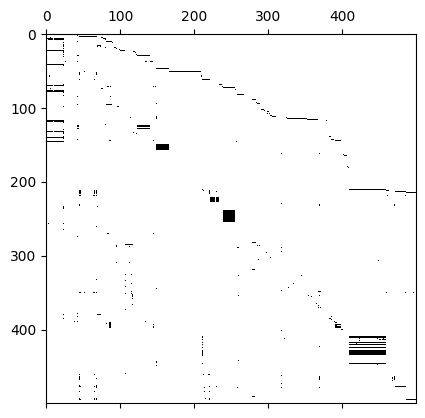

In [3]:
# number of pages
print("number of pages:", len(U))

# number of edges (page links)
print("number of edges (page links):",sum(sum(A)))

# number of dangling nodes
# increase count by 1 in each row where the sum of the row values is 0 :)
print("number of dangling nodes:", sum(1 for i in range(500) if sum(A[i]) == 0))

# max in-degree
print("max in-degree: ", max(np.sum(A, axis = 1)))

# max out-degree
print("max out-degree", max(np.sum(A, axis = 0)))

# parsity pattern of A
plt.spy(A)

## 2

In [4]:
# Assign Values first
n, p, pij, ri = 500, 0.85, [], np.sum(A, axis = 0)

# get values of P based on ri[i]
for i in range(n):
    if ri[i] > 0:
        for j in range(n):
            pij.append(((p*A[i][j])/ri[i]) + ((1-p)/n)) 
    elif ri[i] == 0:
        for j in range(n): 
            pij.append(1/n)

# reshape the resulting P matrix
P = np.array(pij).reshape(500,500)
print("P: \n", P)

# A = I-P
A_matrix = np.identity(500) - P.transpose()
print("A: \n", A_matrix)

# b is a zero vector
b_vector = np.zeros(500)
print("b: \n", b_vector[:10])

P: 
 [[0.002  0.002  0.002  ... 0.002  0.002  0.002 ]
 [0.0003 0.0003 0.0003 ... 0.0003 0.0003 0.0003]
 [0.0003 0.0003 0.0003 ... 0.0003 0.0003 0.0003]
 ...
 [0.0003 0.0003 0.0003 ... 0.0003 0.0003 0.0003]
 [0.0003 0.0003 0.0003 ... 0.0003 0.0003 0.0003]
 [0.0003 0.0003 0.0003 ... 0.0003 0.0003 0.0003]]
A: 
 [[ 9.980e-01 -3.000e-04 -3.000e-04 ... -3.000e-04 -3.000e-04 -3.000e-04]
 [-2.000e-03  9.997e-01 -3.000e-04 ... -3.000e-04 -3.000e-04 -3.000e-04]
 [-2.000e-03 -3.000e-04  9.997e-01 ... -3.000e-04 -3.000e-04 -3.000e-04]
 ...
 [-2.000e-03 -3.000e-04 -3.000e-04 ...  9.997e-01 -3.000e-04 -3.000e-04]
 [-2.000e-03 -3.000e-04 -3.000e-04 ... -3.000e-04  9.997e-01 -3.000e-04]
 [-2.000e-03 -3.000e-04 -3.000e-04 ... -3.000e-04 -3.000e-04  9.997e-01]]
b: 
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### a) LU decomposition

In [5]:
A_LU = A_matrix
A_LU[0] = np.ones(500)
print("A: \n", A_LU[:10][:5])
b_LU = b_vector
b_LU[0] = 1
print("b: \n", b_LU[:10])
t1_start = time.process_time()
pivot, l, u = lu(A_LU)
z = solve_triangular(l, pivot.transpose() @ b_LU, lower=True)
x_LU = solve_triangular(u, z, lower=False)
print("x: \n", x_LU)
print("sum of all rankings: ", sum(x_LU))
t1_stop = time.process_time()
t1 = t1_stop - t1_start


A: 
 [[ 1.00000000e+00  1.00000000e+00  1.00000000e+00 ...  1.00000000e+00
   1.00000000e+00  1.00000000e+00]
 [-2.00000000e-03  9.99700000e-01 -3.00000000e-04 ... -3.00000000e-04
  -3.00000000e-04 -3.00000000e-04]
 [-2.00000000e-03 -3.00000000e-04  9.99700000e-01 ... -3.00000000e-04
  -3.00000000e-04 -3.00000000e-04]
 [-2.00000000e-03 -3.00000000e-04 -6.56846154e-02 ... -3.00000000e-04
  -3.00000000e-04 -3.00000000e-04]
 [-2.00000000e-03 -3.00000000e-04 -3.00000000e-04 ... -3.00000000e-04
  -3.00000000e-04 -3.00000000e-04]]
b: 
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x: 
 [-0.0430554   0.0415868   0.00662914  0.00867016  0.00802299  0.00705764
  0.0088086   0.00705764  0.00705764  0.00406896  0.00406896  0.00705764
  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764
  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764  0.02753428
  0.02486273  0.00066025  0.00122289  0.00066025  0.00066025  0.00066025
  0.00066025  0.00066025  0.00108875  0.00066025  0.00066025  

### b) QR

In [6]:
t2_start = time.process_time()
Q, R = scipy.linalg.qr(A_matrix)
x_QR = solve_triangular(R, Q.transpose() @ b_vector)
print("x: \n", x_QR)
print("sum of all rankings: ", sum(x_QR))
t2_stop = time.process_time()
t2 = t2_stop - t2_start


x: 
 [-0.0430554   0.0415868   0.00662914  0.00867016  0.00802299  0.00705764
  0.0088086   0.00705764  0.00705764  0.00406896  0.00406896  0.00705764
  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764
  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764  0.02753428
  0.02486273  0.00066025  0.00122289  0.00066025  0.00066025  0.00066025
  0.00066025  0.00066025  0.00108875  0.00066025  0.00066025  0.00066025
  0.00066025  0.00066025  0.00132387  0.00066025  0.00066025  0.00066025
  0.00840322  0.002896    0.00066031  0.01604081  0.00661229  0.0011357
  0.0011357   0.0011357   0.0011357   0.0011357   0.00277109  0.0011357
  0.0011357   0.0011357   0.0011357   0.0011357   0.0011357   0.0011357
  0.0011357   0.0011357   0.0011357   0.0011357   0.00335376  0.00873619
  0.0011357   0.00770052  0.01253132  0.00314452  0.00171608  0.00171608
  0.00171608  0.00257308  0.00197777  0.00197777  0.00197777  0.00065531
  0.00065531  0.00065531  0.00193094  0.00140333 

### c) Gauss-Seidel

In [7]:
t3_start = time.process_time() 
eps = 1e-8
x_GS = np.zeros(500)
for k in range(5000):
    x_prev = x_GS.copy()
    for i in range(500):
        x_GS[i]=(b_vector[i] - np.dot(A_matrix[i,:i], x_GS[:i]) - np.dot(A_matrix[i,(i+1):],x_prev[(i+1):]))/A_matrix[i ,i]
    if np.isclose(np.linalg.norm(x_GS - x_prev)/np.linalg.norm(x_GS), eps)==True:
        break
x_GS = x_GS/sum(x_GS)
print("x: \n", x_GS)
print("sum of all rankings: ", sum(x_GS))
t3_stop = time.process_time()
t3 = t3_stop - t3_start

x: 
 [ 5.69250108e-01 -2.75538050e-02 -3.06059845e-03 -4.20862226e-03
 -3.76906068e-03 -3.22037848e-03 -4.22125324e-03 -3.29241784e-03
 -3.33690683e-03 -1.46222124e-03 -1.46230468e-03 -3.33729154e-03
 -3.33750841e-03 -3.33772464e-03 -3.33794022e-03 -3.33815516e-03
 -3.33836944e-03 -3.33858308e-03 -3.33879608e-03 -3.33900842e-03
 -3.33922011e-03 -3.33943116e-03 -3.33964155e-03 -1.67800309e-02
 -1.51836771e-02  7.56333735e-04  2.64986191e-04  7.56731358e-04
  7.57062767e-04  7.57394271e-04  7.57725868e-04  7.58057559e-04
  5.55741777e-04  7.58708134e-04  7.59040146e-04  7.59372252e-04
  7.59704451e-04  7.60036745e-04  4.88241310e-05  7.60730955e-04
  7.61063732e-04  7.61396603e-04 -2.95913812e-03  4.49382631e-04
  7.52054874e-04 -1.13623867e-02 -3.54071858e-03  5.24365513e-04
  5.24716013e-04  5.25066682e-04  5.25417518e-04  5.25768522e-04
 -3.92763579e-04  5.26295348e-04  5.26646936e-04  5.26998692e-04
  5.27350616e-04  5.27702709e-04  5.28054970e-04  1.33168911e-03
  1.33225613e-03  1.

### d) SVD

In [8]:
t4_start = time.process_time() 
u, s, vh = np.linalg.svd(A_matrix, full_matrices=True)
Utb = u.transpose() @ b_vector
y = Utb/s
x_SVD = vh.transpose() @ y
x_SVD = x_SVD/sum(x_SVD)
print("x: \n", x_SVD)
print("sum of all rankings: ", sum(x_SVD))
t4_stop = time.process_time()
t4 = t4_stop - t4_start

x: 
 [-0.0430554   0.0415868   0.00662914  0.00867016  0.00802299  0.00705764
  0.0088086   0.00705764  0.00705764  0.00406896  0.00406896  0.00705764
  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764
  0.00705764  0.00705764  0.00705764  0.00705764  0.00705764  0.02753428
  0.02486273  0.00066025  0.00122289  0.00066025  0.00066025  0.00066025
  0.00066025  0.00066025  0.00108875  0.00066025  0.00066025  0.00066025
  0.00066025  0.00066025  0.00132387  0.00066025  0.00066025  0.00066025
  0.00840322  0.002896    0.00066031  0.01604081  0.00661229  0.0011357
  0.0011357   0.0011357   0.0011357   0.0011357   0.00277109  0.0011357
  0.0011357   0.0011357   0.0011357   0.0011357   0.0011357   0.0011357
  0.0011357   0.0011357   0.0011357   0.0011357   0.00335376  0.00873619
  0.0011357   0.00770052  0.01253132  0.00314452  0.00171608  0.00171608
  0.00171608  0.00257308  0.00197777  0.00197777  0.00197777  0.00065531
  0.00065531  0.00065531  0.00193094  0.00140333 

### e) Computational Speed

In [9]:
print("LU: ", t1, "\nQR: ", t2, "\nGS: ", t3, "\nSVD: ", t4)

LU:  0.08329500000000056 
QR:  0.1852109999999998 
GS:  14.033798 
SVD:  0.22067499999999995


### f) top 20 urls

In [10]:
# this code is not working for me for some reason in my computer...
x_mat = [x_LU, x_QR, x_GS, x_SVD]
for x in x_mat:
    index = x.argsort()[::-1][:20]
    print(U[index])
    

KeyError: "None of [Int64Index([1, 23, 24, 45, 109, 68, 209, 6, 65, 3, 42, 4, 67, 369, 18, 11, 5,\n            21, 12, 7],\n           dtype='int64')] are in the [columns]"

## 3

These methods do not work in that big of a dataset, especially the Gauss-Sidel method, which took far longer to run than any other method.